In [101]:
import urllib.request
from urllib.request import Request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
def askURL(url):
    head={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"
    }
    request=urllib.request.Request(url=url,headers=head)
    html=""
    try:
        response=urllib.request.urlopen(request)
        html=response.read().decode("utf-8")
    except urllib.error.URLError as e:
        if hasattr(e,"code"):
            print(e.code)
        if hasattr(e,"reason"):
            print(e.reason)
    return html
def getData(baseUrl):
    dataList=[]
    for i in range(10):
        url=baseUrl+str(i*25)
        html=askURL(url)
        soup=BeautifulSoup(html,"html.parser")
        #寻找评分
        findRating=re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')
        for item in soup.find_all('div',class_='item'):
            item=str(item)
            dataList.append(re.findall(findRating, item))
    return dataList
def getNum(baseUrl):
    dataNum=[]
    for i in range(10):
        url=baseUrl+str(i*25)
        html=askURL(url)
        soup=BeautifulSoup(html,"html.parser")
        findNum=re.compile(r'<span>(\d*)人评价</span>')
        for item in soup.find_all('div',class_='item'):
            item=str(item)
            dataNum.append(re.findall(findNum, item))
    return dataNum

In [102]:
rate=getData("https://movie.douban.com/top250?start=")
num=getNum("https://movie.douban.com/top250?start=")

In [103]:
corNum=np.array(num).ravel().astype(np.float64)
corRate=np.array(rate).ravel().astype(np.float64)
norNum=(corNum-np.mean(corNum))/np.std(corNum)
norRate=(corRate-np.mean(corRate))/np.std(corRate)
print(norRate)
print(norNum)

[ 3.12657326  2.74731886  2.36806446  1.98881006  2.36806446  1.98881006
  1.98881006  2.36806446  1.60955566  1.98881006  1.60955566  1.60955566
  1.23030127  1.60955566  1.60955566  1.60955566  1.23030127  1.60955566
  1.23030127  1.23030127  1.23030127  1.60955566  0.85104687  0.85104687
  1.23030127  1.23030127  2.74731886  1.23030127  1.60955566  0.85104687
  1.23030127  0.47179247  1.23030127  0.85104687  0.85104687  0.47179247
  1.98881006  1.23030127  0.85104687  0.47179247  0.85104687  1.23030127
  1.23030127  0.47179247  0.85104687  1.23030127  0.47179247  0.47179247
  0.47179247  0.85104687  1.23030127  0.85104687  0.47179247  0.85104687
  1.60955566  0.47179247  0.85104687  0.47179247  0.85104687  0.47179247
  0.85104687  0.47179247  1.23030127  0.09253807  0.09253807 -0.28671632
 -0.28671632  0.09253807  1.23030127  0.47179247  0.09253807  0.85104687
  0.47179247  0.09253807  1.23030127  1.23030127  0.09253807 -0.28671632
 -0.28671632 -0.28671632 -0.28671632  0.09253807 -0

In [104]:
import matplotlib.pyplot as plt


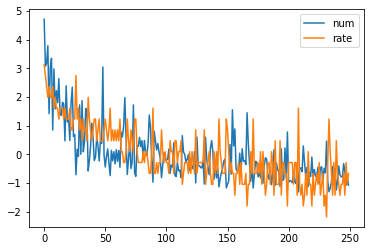

In [105]:
plt.plot(norNum,label='num')
plt.plot(norRate,label='rate')
plt.legend()

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lr=LinearRegression().fit(np.array(num).astype(np.float64),np.array(rate).astype(np.float64))

In [108]:
lr.coef_

array([[3.17699911e-07]])

array([8.71496205, 8.71496237, 8.71496269, 8.714963  , 8.71496332,
       8.71496364, 8.71496396, 8.71496427, 8.71496459, 8.71496491])

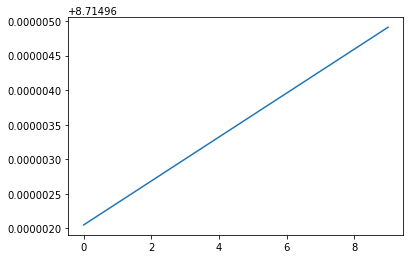

In [109]:
cum=[]
for i in range(10):
    cum.append(i*lr.coef_+lr.intercept_)
arCum=np.array(cum)
arCum=arCum.ravel()
plt.plot(arCum)
arCum

In [110]:
print(np.array(rate).astype(np.float64).ravel().shape)

(250,)


In [111]:
np.array(rate).astype(np.float64)

array([[9.7],
       [9.6],
       [9.5],
       [9.4],
       [9.5],
       [9.4],
       [9.4],
       [9.5],
       [9.3],
       [9.4],
       [9.3],
       [9.3],
       [9.2],
       [9.3],
       [9.3],
       [9.3],
       [9.2],
       [9.3],
       [9.2],
       [9.2],
       [9.2],
       [9.3],
       [9.1],
       [9.1],
       [9.2],
       [9.2],
       [9.6],
       [9.2],
       [9.3],
       [9.1],
       [9.2],
       [9. ],
       [9.2],
       [9.1],
       [9.1],
       [9. ],
       [9.4],
       [9.2],
       [9.1],
       [9. ],
       [9.1],
       [9.2],
       [9.2],
       [9. ],
       [9.1],
       [9.2],
       [9. ],
       [9. ],
       [9. ],
       [9.1],
       [9.2],
       [9.1],
       [9. ],
       [9.1],
       [9.3],
       [9. ],
       [9.1],
       [9. ],
       [9.1],
       [9. ],
       [9.1],
       [9. ],
       [9.2],
       [8.9],
       [8.9],
       [8.8],
       [8.8],
       [8.9],
       [9.2],
       [9. ],
       [8.9],
      

In [ ]:
import urllib.request
from urllib.request import Request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
def askURL(url):
    head={
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36"
    }
    request=urllib.request.Request(url=url,headers=head)
    html=""
    try:
        response=urllib.request.urlopen(request)
        html=response.read().decode("utf-8")
    except urllib.error.URLError as e:
        if hasattr(e,"code"):
            print(e.code)
        if hasattr(e,"reason"):
            print(e.reason)
    return html
def getSoup(baseUrl):
    for i in range(10):
        url=baseUrl+str(i*25)
        html=askURL(url)
        soup=BeautifulSoup(html,"html.parser")
def par(soup):
    dataList=[]
    for item in soup.find_all('div',class_='item'):
            item=str(item)
            dataList.append(re.findall(findRating, item))
    return dataList
def getNum(baseUrl):
    dataNum=[]
    for i in range(10):
        url=baseUrl+str(i*25)
        html=askURL(url)
        soup=BeautifulSoup(html,"html.parser")
        findNum=re.compile(r'<span>(\d*)人评价</span>')
        for item in soup.find_all('div',class_='item'):
            item=str(item)
            dataNum.append(re.findall(findNum, item))
    return dataNum

In [ ]:
rate=getData("https://movie.douban.com/top250?start=")